# Análise Exploratória em Conjunto de Dados do Kaggle

# Importando Bibliotecas

In [1]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style='dark')
%matplotlib inline

# Importando data set

In [2]:
dataset_path = "C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Carros_Dsa/dataset/autos/autos.csv"
df_carros = pd.read_csv(dataset_path, encoding='latin-1')

In [3]:
#Verificando dataset
df_carros.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manuell,102,...,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manuell,109,...,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manuell,50,...,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manuell,101,...,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manuell,105,...,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1


In [4]:
#analisando estatisticamente o dataframe 
df_carros.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


Podemos perceber que temos valores 0, o que possivelmente pode indicar um erro no registro dos dados

In [5]:
#Verificando as coluans do meu dataset
df_carros.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

# Distribuição de Veículos com Base no Ano de Registro

Após analisar o dataset, verificamos a coluna "yearOfRegistration" no qual nos dá a informação que queremos, logo, iremos plotar um gráfico para verificarmos sua dispersão 

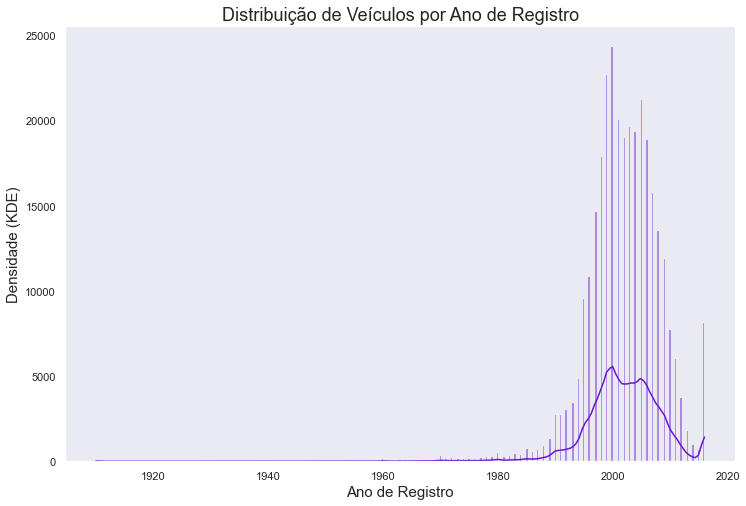

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df_carros['yearOfRegistration'], color='#6815d4', kde=True, ax=ax)
ax.set_title('Distribuição de Veículos por Ano de Registro', fontsize=18)
ax.set_ylabel('Densidade (KDE)', fontsize=15)
ax.set_xlabel('Ano de Registro', fontsize=15)
plt.show()

In [7]:
#Salvando a figplot
fig.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/distirbuicao_de_veiculos.png')

# Variação de faixa de preço pelo tipo de veículo

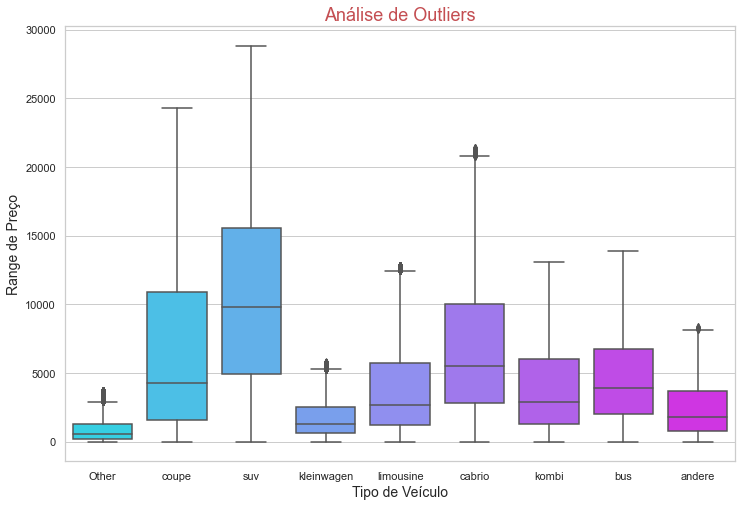

In [8]:
#Gerando um boxplot para avaliar os outiliers

sns.set_style('whitegrid')
fig, ax =plt.subplots(figsize=(12,8))
sns.boxplot(x='vehicleType', y='price', data=df_carros, palette='cool')
ax.set_title('Análise de Outliers', fontsize=18, color='r')
ax.set_xlabel('Tipo de Veículo', fontdict={'size':14})
ax.set_ylabel('Range de Preço', fontdict={'size':14})
plt.show()

In [9]:
#Salvando Box plot na pasta
fig.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/Preco_X_Veiculo.png')

# Contagem total de veículos à venda conforme o tipo de veículo

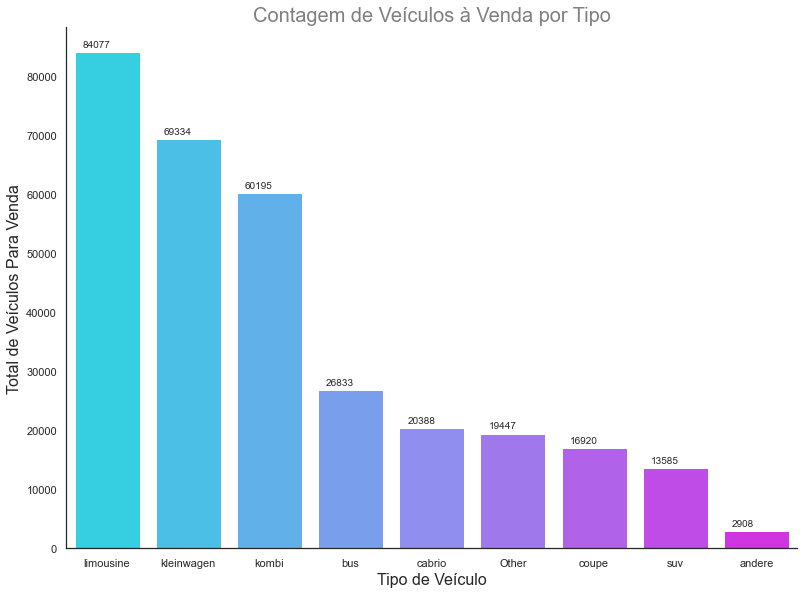

In [10]:
#Gerando gráfico para visualizar a quantidade de veículos
sns.set_style('white')

graf_cont = sns.catplot(x='vehicleType',
                        data=df_carros,
                        kind='count',
                        palette='cool',
                        height=8,
                        aspect=1.4,
                        order=df_carros['vehicleType'].value_counts().index)

graf_cont.ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':16})
graf_cont.ax.yaxis.set_label_text('Total de Veículos Para Venda', fontdict={'size':16})
graf_cont.ax.set_title('Contagem de Veículos à Venda por Tipo', fontdict={'size':20}, color= 'grey')

#gerando contagem de veículos e colocando no gráfico
for veiculo in graf_cont.ax.patches:
    graf_cont.ax.annotate(((veiculo.get_height())), (veiculo.get_x()+0.1, veiculo.get_height()+500), ha='left', va='bottom')

In [11]:
#Salvando imagem
graf_cont.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/Cont_Veiculo.png')

# Número de veículos pertencentes a cada marca

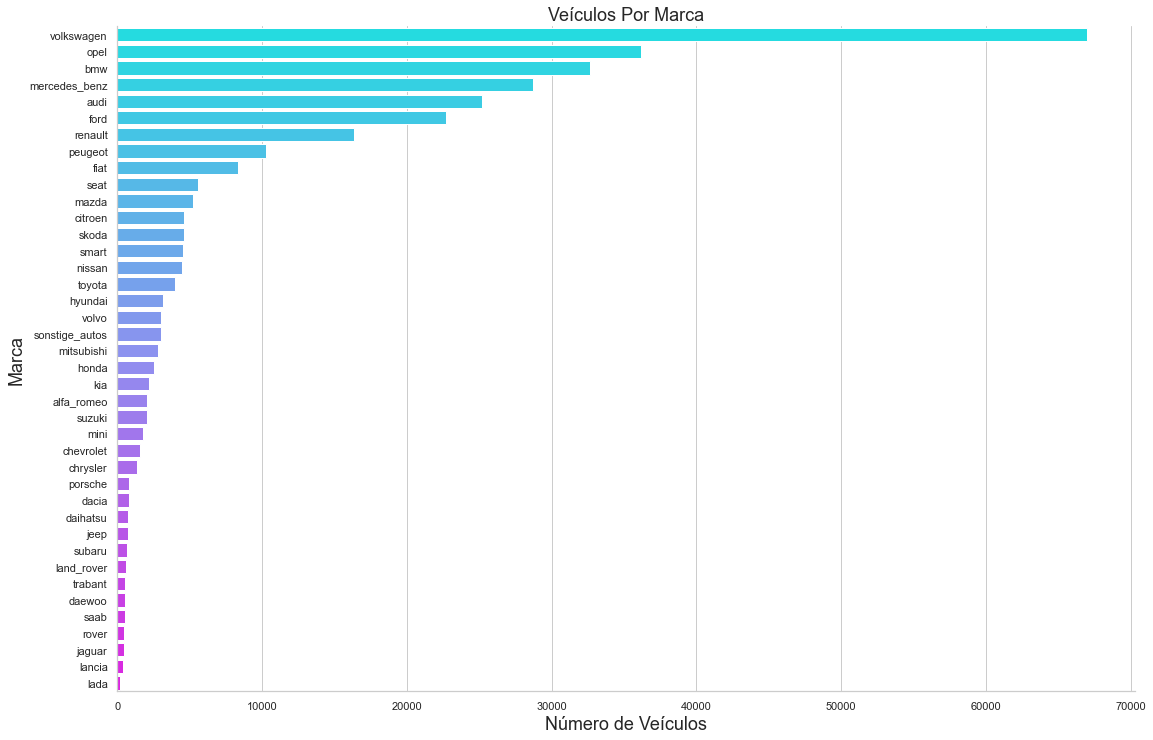

In [18]:
sns.set_style('whitegrid')
graf_veiculos = sns.catplot(y='brand',
                            data=df_carros,
                            kind='count',
                            palette='cool',
                            height=10,
                            aspect=1.6,
                            order=df_carros['brand'].value_counts().index)

graf_veiculos.ax.set_title('Veículos Por Marca', fontdict={'size':18})
graf_veiculos.ax.xaxis.set_label_text('Número de Veículos', fontdict={'size':18})
graf_veiculos.ax.yaxis.set_label_text('Marca', fontdict={'size':18})
plt.show()

In [19]:
#Salvando imagem
graf_veiculos.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/Marcas_Veiculos.png')

# Preço Médio dos Veículos com base no tipo de veículo e tipo de caixa de câmbio

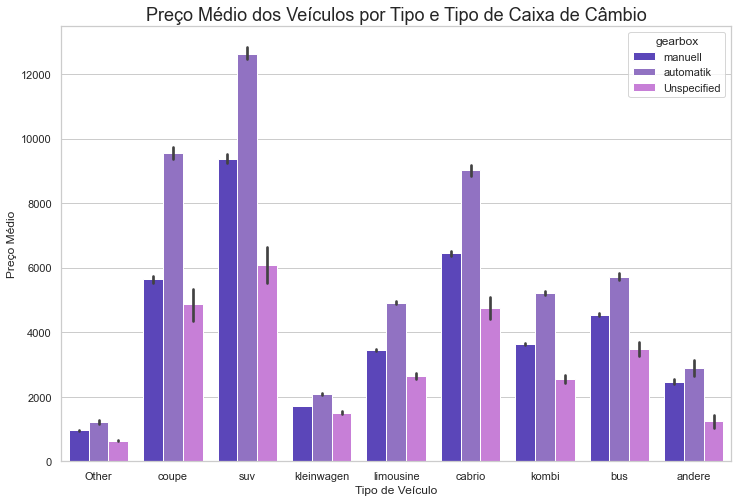

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
cores =['#4f33cc', '#8e65cf', '#d070e6']

graf_prec_med = sns.barplot(x='vehicleType', 
            y='price',
            hue='gearbox',
            palette=cores,
            data=df_carros)

ax.set_title('Preço Médio dos Veículos por Tipo e Tipo de Caixa de Câmbio', fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':12})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':12})

# for veiculo in graf_prec_med.axes.patches:
#     graf_prec_med.axes.annotate(((veiculo.get_height())), (veiculo.get_x()+0.1, veiculo.get_height()+500), ha='left', va='bottom')

plt.show()

In [22]:
#Salvando o plot
fig.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/Preco_Med_Tipo_Vel_Caixa.png')

# Preço Médio do Veículo por Tipo de Combustível e tipo de caixa de câmbio

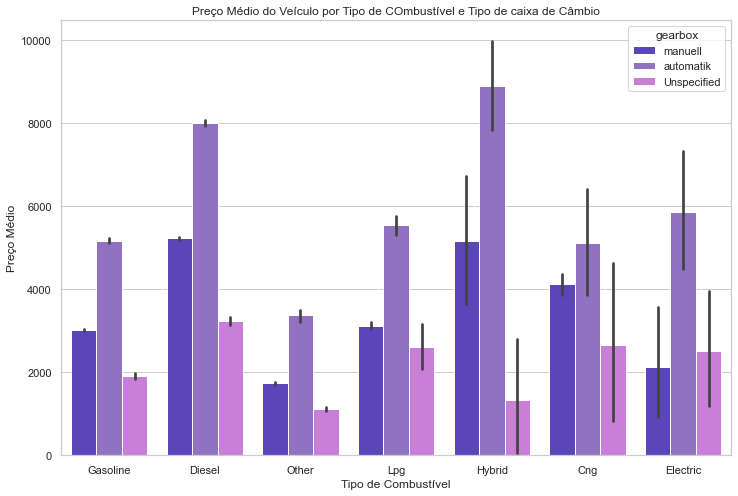

In [33]:
#Criando barplot para verificar os resultados
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='fuelType',
            y='price',
            hue='gearbox',
            palette=cores,
            data=df_carros)
ax.xaxis.set_label_text('Tipo de Combustível', fontdict= {'size':12})
ax.yaxis.set_label_text('Preço Médio', fontdict= {'size':12})
ax.set_title('Preço Médio do Veículo por Tipo de COmbustível e Tipo de caixa de Câmbio', fontdict={'size':12})
plt.show()

In [26]:
#Salvando o plot
fig.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/preco_veiculo_tipo_cambi.png')

# Potência Média de um Veículo por Tipo de Veículo e tipo de caixa de câmbio

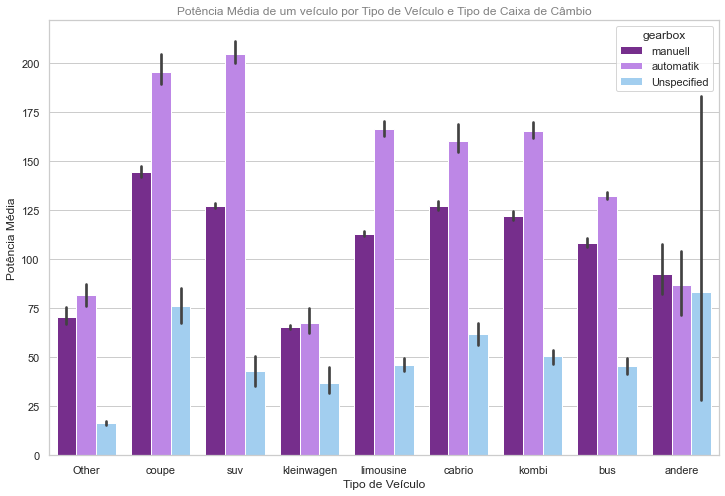

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
cores = ['purple', 'light purple', 'light blue', 'grey']
sns.set_palette(sns.xkcd_palette(cores))
sns.barplot(x='vehicleType',
            y='powerPS',
            hue='gearbox',
            data=df_carros)

ax.set_title('Potência Média de um veículo por Tipo de Veículo e Tipo de Caixa de Câmbio', color='grey')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict= {'size':12})
ax.yaxis.set_label_text('Potência Média', fontdict= {'size':12})
plt.show()


In [39]:
#Salvando a figura
fig.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/Potenciamed_veic_cambio.png')

# Calculando a média de preço por marca e por veículo

In [42]:
new_df = pd.DataFrame()
for marca in list(df_carros['brand'].unique()):
    for tipo in list(df_carros['vehicleType'].unique()):
        med = df_carros[(df_carros['brand'] == marca) & (df_carros['vehicleType']==tipo)]['price'].mean()
        new_df = new_df.append(pd.DataFrame({'Marca': marca, 'Tipo de Veículo':tipo,'Preço Médio':med}, index=[0]))
new_df = new_df.reset_index()
new_df['Preço Médio'].fillna(0, inplace=True)
new_df['Preço Médio'].isnull().value_counts()
new_df['Preço Médio'] = new_df['Preço Médio'].astype(int)
new_df.head(5) 

,index,Marca,Tipo de Veículo,Preço Médio
0,0,volkswagen,Other,897
1,0,volkswagen,coupe,8014
2,0,volkswagen,suv,13946
3,0,volkswagen,kleinwagen,1626
4,0,volkswagen,limousine,3743


# Preço Médio de um veículo por marca, e por tipo de veículo

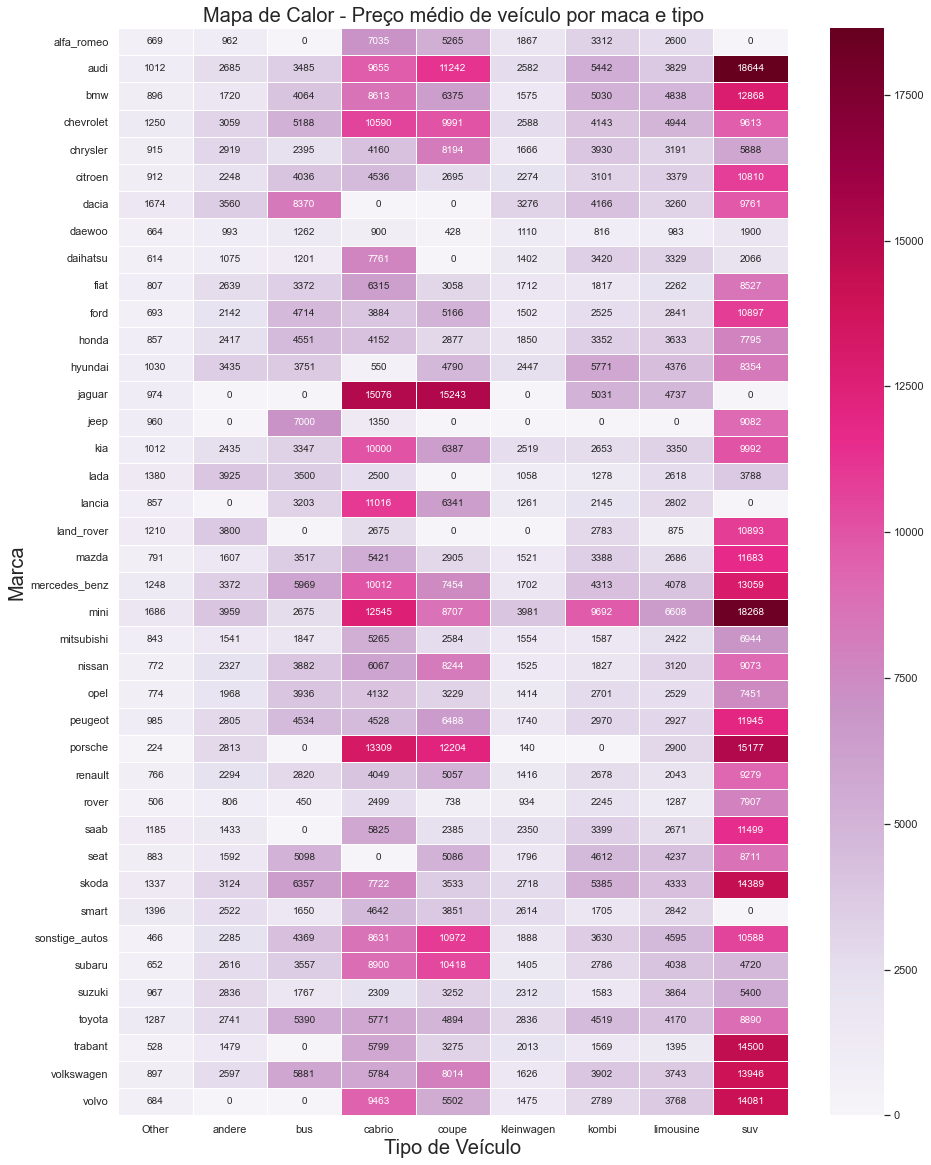

In [53]:
#Criando mapa de calor para verificar visualmente

mapa_calor = new_df.pivot('Marca', 'Tipo de Veículo', 'Preço Médio')
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(mapa_calor,
            linewidths=1,   
            cmap='PuRd',
            annot=True,
            ax=ax,
            fmt='d')
ax.set_title('Mapa de Calor - Preço médio de veículo por maca e tipo', fontdict={'size':20})
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':20})
ax.yaxis.set_label_text('Marca', fontdict={'size':20})
plt.show()


In [56]:
#Salvando figura
fig.savefig('C:/Users/caioserpa/OneDrive/Projetos/MiniProjeto2/Figuras/mapa_precoXmarcaXtipo.png')